In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
ex1data2 = pd.read_csv('dataset/ex1data2.txt', header=None)

In [4]:
ex1data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
X = ex1data2[[0,1]].values
y = ex1data2[[2]].values

In [6]:
def feature_normalization(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    Z = (X-mu)/std
    return Z

In [7]:
X_norm = feature_normalization(X)

In [8]:
X0 = np.ones((len(X),1))

In [9]:
X = np.append(X0, X_norm, axis = 1)

In [10]:
theta = np.zeros((X.shape[1]))
theta

array([0., 0., 0.])

In [11]:
def hypothesis(X, theta):
    htheta = np.dot(X, theta.T)
    return htheta

In [12]:
theta = np.array([1,2,3])
htheta = hypothesis(X,theta)
htheta

array([  0.58455074,  -0.6975615 ,   1.33753729,  -5.15052982,
         6.84875699,   4.2667254 ,  -0.86545715,  -1.13765161,
        -1.25721367,  -0.96721209,   4.15225109,   0.3199879 ,
         0.04016181,  14.59349761,  -1.5421275 ,   5.06804555,
        -5.39474168,  -1.62353145,   5.85410246,   6.92761707,
        -0.27273462,  -3.94982154,  -0.687386  ,   4.20821631,
         5.1279088 ,  -1.96949824,  -1.05879153,   1.65806535,
         0.8287626 ,   1.94043531,  -4.07447134, -10.1936768 ,
         4.40663844,   3.21237206,   3.82409141,  -1.11221288,
        -1.61589983,   4.6406748 ,   9.93956328,   4.71699101,
        -4.5196492 ,   0.92542979,   5.74725977,  -1.71511089,
        -6.58527447,   3.92839023,  -1.70747927])

In [13]:
def costfunction(X,y,theta):
    m = len(X)
    htheta = hypothesis(X, theta)
    jtheta = (htheta-y.T)**2
    jthetasum = jtheta.sum()/m
    
    return jthetasum

In [14]:
jtheta = costfunction(X,y,theta)

In [15]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)
    theta = np.zeros((X.shape[1]))
    error = []
    for i in range(num_iters):
        jtheta = costfunction(X,y,theta)
        error.append(jtheta)
        htheta = hypothesis(X,theta)
        delta = (np.dot((htheta-y.T),X))
        deltasum = (np.sum(delta,axis=0)/m)*alpha
        theta = theta - deltasum
    return theta, error

In [16]:
iteration = 1000
alpha = 0.1
theta, error = gradientDescent(X, y, theta, alpha, iteration)

In [17]:
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [18]:
ypred = hypothesis(X, theta)
ypred

array([356283.1103389 , 286120.93063401, 397489.46984811, 269244.1857271 ,
       472277.85514636, 330979.02101847, 276933.02614885, 262037.48402897,
       255494.58235014, 271364.59918815, 324714.54068768, 341805.20024106,
       326492.02609913, 669293.21223209, 239902.98686016, 374830.38333402,
       255879.96102141, 235448.2452916 , 417846.48160547, 476593.38604091,
       309369.11319496, 334951.62386342, 286677.77333009, 327777.17551607,
       604913.37413438, 216515.5936252 , 266353.01492351, 415030.01477434,
       369647.33504459, 430482.39959029, 328130.30083655, 220070.56444809,
       338635.60808944, 500087.7365991 , 306756.36373941, 263429.59076914,
       235865.87731365, 351442.99009906, 641418.82407778, 355619.31031959,
       303768.43288347, 374937.34065726, 411999.63329673, 230436.66102696,
       190729.36558116, 312464.00137413, 230854.29304902])

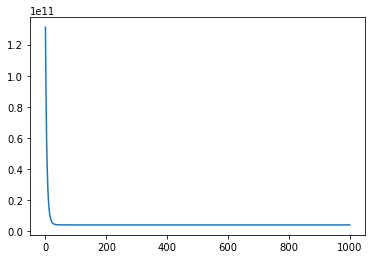

In [19]:
plt.plot(error)

In [20]:
def r2_score(y, ypred):
    ymean = np.mean(y)
    num = np.sum((y.T - ypred)**2)
    den = np.sum((y.T - ymean)**2)
    output = 1-num/den
    
    return output

In [21]:
r2_score(y, ypred)

0.7329450180289142

In [22]:
from sklearn import linear_model

In [23]:
reg = linear_model.LinearRegression()

In [24]:
reg.fit(X, y)

LinearRegression()

In [25]:
y_pred = reg.predict(X)

In [26]:
reg.score(X, y)

0.7329450180289143